<a href="https://colab.research.google.com/github/kimsunlim/TIL/blob/master/chapter3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.k최근접 이웃 회귀

1) 데이터 준비 
- 넘파이 배열형태로

In [1]:
import numpy as np 
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [2]:
print(perch_length.shape)

(56,)


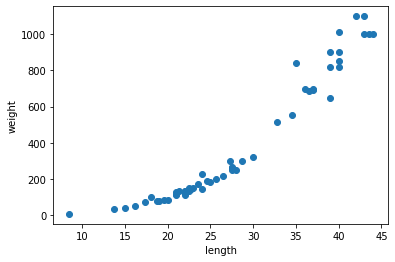

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

2) 데이터셋 분리

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target= train_test_split(perch_length,perch_weight, random_state=42)

- 훈련세트는 2차원 배열이어야함
- 1차원 배열을 2차원으로 만들어줘야함> reshape 사용

In [5]:
train_input= train_input.reshape(-1,1)
test_input= test_input.reshape(-1,1)
print(train_input.shape)


(42, 1)


3) k최근접이웃 회귀 모델 훈련

In [6]:
from sklearn.neighbors import KNeighborsRegressor

In [7]:
knr= KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

- 회귀에서는 정확한 숫자를 맞힌다는 것은 불가능, 모두 임의의 수치이기에
-결정계수로 평가 
- 타깃과 예측한 값 사이의 차이를 구하는 것 

In [8]:
from sklearn.metrics import mean_absolute_error
test_pred = knr.predict(test_input)
mae=mean_absolute_error(test_target, test_pred)
print(mae)

19.157142857142862


In [9]:
print(knr.score(train_input, train_target))

0.9698823289099254


- 훈련데이터가 테스트 데이터 보다 값이 높은경우 '과대적합'
- 반대의 경우는 과소 적합
- 이웃의 개수를 조정해서 해결 

In [10]:
knr.n_neighbors =3 
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))

0.9804899950518966


### 2.선형회귀


- 농어데이터 준비

In [ ]:
import numpy as np 
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

- 데이터셋 분리 

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target= train_test_split(perch_length,perch_weight, random_state=42)

- 훈련, 테스트셋 2차원 배열로 변환

In [ ]:
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

*k-최근접 이웃의 한계*


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
print(knr.predict([[50]]))

[1033.33333333]


- k최근접이웃회귀>농어 50cm 무게 1033g정도로 예측함
- 실제 농어 무게는 더 많이 나감. 오류발생 
- 산점도로도 확인해보기 

In [ ]:
import matplotlib.pyplot as plt 

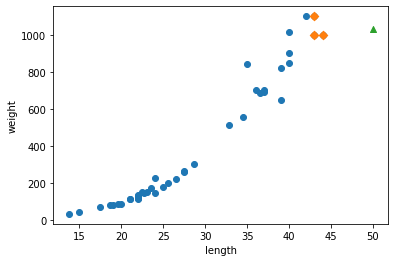

In [ ]:
distances,indexs= knr.kneighbors([[50]])
plt.scatter(train_input,train_target)
plt.scatter(train_input[indexs],train_target[indexs],marker='D')

plt.scatter(50,1033,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


- 길이가 커질수록 농어 무게가 증가하는 경향이 있음 
- 가장 가까운 농어 무게들의 평균을 구함
- 그래서 훈련세트 범위를 벗어나면 엉뚱한 값을 예측 할 수 있음

### 선형회귀

In [11]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

#모델 훈련 
lr.fit(train_input, train_target)

#50cm농어 예측
print(lr.predict([[50]]))

[1241.83860323]


In [13]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))


0.939846333997604
0.8247503123313558


#### 다항회귀


In [14]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [15]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [16]:
lr=LinearRegression()

#모델 훈련 
lr.fit(train_poly, train_target)

#50cm농어 예측
print(lr.predict([[50**2,50]]))

[1573.98423528]


In [17]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


### 3.특성공학과 규제

#### 다중회귀
- 여러 개의 특성을 활용한 선형 휘귀를 '다중 회귀'라고 함!
- 농어 데이터의 높이와 두께 데이터도 추가해서 다중 회귀 사용
- 특성끼리 곱해서 새로운 특성을 만드는것 == 특성 공학이라고 함

*pandas활용하면 데이터프레임을 가져올수 있다.

In [19]:
import pandas as pd 
df=pd.read_csv('http://bit.ly/perch_csv_data')
perch_full=df.to_numpy()  #데이터 불러온 다음 넘파이 배열로 변환 
print(perch_full) #3개의 특성이 들어간 데이터 

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [20]:
## 타깃인 무게 데이터 
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


In [22]:
# perch_full 와 perch_weight데이터셋 분리 

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

#### 사이킷런은 특성을 만들거나 전처리 하기 위해 다양한 클래스를 제공한다 >>변환기

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
# 샘플
poly=PolynomialFeatures(include_bias =False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
#2,3에서 제곱과 특성끼리 곱한 항이 추가됨

[[2. 3. 4. 6. 9.]]


In [26]:
## 데이터에 적용 
poly=PolynomialFeatures(include_bias =False)
poly.fit(train_input)
train_poly= poly.transform(train_input)
print(train_poly.shape)
#9개의 특성이 생김

(42, 9)


In [27]:
poly.get_feature_names_out()  #어떤조합으로 특성이 생겼는지 확인 가능 

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [28]:
test_poly= poly.transform(test_input)

#### 다중 회귀 모델 훈련 

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
#정확도가 높아짐 

0.9903183436982124
0.9714559911594134


- 특성을 늘리면 선형 모델은 강력해진다 그런데, 과하게 복잡해지면 과대적합이 된다.
-'규제' 훈련세트를 너무 과도하게 학습하지 못하도록 하는것 >> 기울기를 줄임 

In [33]:
##정규화 
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled= ss.transform(test_poly)

#### 릿지: 선형회귀 모델에 규제를 추가, 계수를 제곱한것을 기준 
####  라쏘: 절댓값을 기준으로 규제 적용

In [36]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1) #규제 조정 가능 
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9889354346720892
0.9856564835209134


In [40]:
from sklearn.linear_model import Lasso
lasso= Lasso() #규제 조정 가능 
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.986591255464559
0.9846056618190413
